## XSBench  

Compiler: `clang`  
flags: `-std=gnu99 -g -pg -O3`  
libs: `-lm`  
run parameters: `-t 1` (Serial Run)  
Haswell

###### XSBench spent 72.6% of its time in loop at XSutils.c:59. 
```c
	// Begins binary search	 // Conditional Branch Misprediction Rate | CPUTIME
|59|	while( max >= min )                       // 55.1% | 72.6%
|60|	{
|61|		mid = min + floor( (max-min) / 2.0);  // 53.5% |  9.8% | When Combined BR_CN and BR_MSP:
|62|		if( A[mid].energy < quarry )          //  0.2% | 46.9% |     (7.2% MSP Rate)
|63|			min = mid+1;
|64|        else if( A[mid].energy > quarry )     // 83.9% |  5.2%
|65|			max = mid-1;
|66|		else
|67|			return mid;
        }
```
#### While Loop Conditional Branch Breakdown
74.3% of the total branch instructions are from this loop. 1.13e+11 Instructions  
Of the total instructions 46.2% are conditional branch instructions. 5.22e+10 Instructions  
Of the conditional branch instructions 6.8% are mispredicted.  3.56e+9 Instructions


#### While Loop Instruction Breakdown

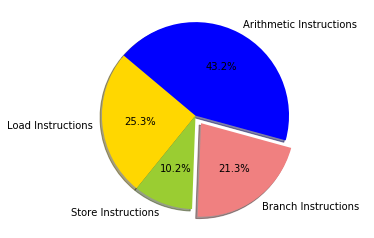

In [5]:
import matplotlib.pyplot as plt

Arith_INS = 5.3 - 1.34 - .543 - 1.13
 
# Data to plot
labels = 'Load Instructions', 'Store Instructions', 'Branch Instructions', 'Arithmetic Instructions'
sizes = [1.34, .543, 1.13, Arith_INS]
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue']
explode = (0, 0, 0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.title = "While Loop"
plt.axis('equal')
plt.show()

In [8]:
import pandas as pd

inst_df = pd.DataFrame.from_csv('/Users/brianhomerding/Documents/Profiles/XSBenchINST.csv')
branch_df = pd.DataFrame.from_csv('/Users/brianhomerding/Documents/Profiles/XSBenchBRANCH.csv')

In [9]:
inst_df

CPUTIME(E) PAPI_TOT_CYCLE(E)  PAPI_TOT_INS(E)  \
Scope                                                                          
"loop at XSutils.c: 59"   2.93e+08 69.2%    6.68e+11 69.6%   5.30e+11 65.8%    
"XSutils.c: 62"           1.98e+08 46.9%    4.64e+11 48.4%   4.23e+11 52.5%    
"XSutils.c: 61"           4.14e+07  9.8%    9.68e+10 10.1%   5.25e+10  6.5%    
"XSutils.c: 64"           2.19e+07  5.2%    4.42e+10  4.6%   2.01e+10  2.5%    
"loop at XSutils.c: 59"   2.93e+08 69.2%    6.68e+11 69.6%   5.30e+11 65.8%    
"XSutils.c: 62"           1.98e+08 46.9%    4.64e+11 48.4%   4.23e+11 52.5%    
"XSutils.c: 61"           4.14e+07  9.8%    9.68e+10 10.1%   5.25e+10  6.5%    
"XSutils.c: 64"           2.19e+07  5.2%    4.42e+10  4.6%   2.01e+10  2.5%    
\n                                    NaN               NaN              NaN   

                         PAPI_TOT_CYCLE(E).1   PAPI_LD_INS(E)  \
Scope                                                           
"loop at XSutils.c: 59"      5.53e+11 69.2%   1.34e+11 57.4%    
"XSutils.c: 62"              3.85e+11 48.2%   9.81e+10 42.0%    
"XSutils.c: 61"              7.98e+10 10.0%   1.67e+10  7.1%    
"XSutils.c: 64"              3.74e+10  4.7%   6.60e+09  2.8%    
"loop at XSutils.c: 59"      5.53e+11 69.2%   1.34e+11 57.4%    
"XSutils.c: 62"              3.85e+11 48.2%   9.81e+10 42.0%    
"XSutils.c: 61"              7.98e+10 10.0%   1.67e+10  7.1%    
"XSutils.c: 64"              3.74e+10  4.7%   6.60e+09  2.8%    
\n                                       NaN              NaN   

                         PAPI_TOT_CYCLE(E).2   PAPI_SR_INS(E)  \
Scope                                                           
"loop at XSutils.c: 59"      1.50e+11 64.0%   5.43e+10 53.5%    
"XSutils.c: 62"              1.04e+11 44.4%   3.84e+10 37.8%    
"XSutils.c: 61"              2.20e+10  9.4%   8.82e+09  8.7%    
"XSutils.c: 64"              1.00e+10  4.3%   1.76e+09  1.7%    
"loop at XSutils.c: 59"      1.50e+11 64.0%   5.43e+10 53.5%    
"XSutils.c: 62"              1.04e+11 44.4%   3.84e+10 37.8%    
"XSutils.c: 61"              2.20e+10  9.4%   8.82e+09  8.7%    
"XSutils.c: 64"              1.00e+10  4.3%   1.76e+09  1.7%    
\n                                       NaN              NaN   

                         PAPI_TOT_CYCLE(E).3   PAPI_BR_INS(E)  \
Scope                                                           
"loop at XSutils.c: 59"      6.01e+10 57.8%   1.13e+11 74.3%    
"XSutils.c: 62"              4.19e+10 40.3%   8.51e+10 56.1%    
"XSutils.c: 61"              8.62e+09  8.3%   1.30e+10  8.6%    
"XSutils.c: 64"              4.00e+09  3.8%    5.01e+09  3.\n   
"loop at XSutils.c: 59"      6.01e+10 57.8%   1.13e+11 74.3%    
"XSutils.c: 62"              4.19e+10 40.3%   8.51e+10 56.1%    
"XSutils.c: 61"              8.62e+09  8.3%   1.30e+10  8.6%    
"XSutils.c: 64"              4.00e+09  3.8%   5.01e+09  3.3%    
\n                                       NaN              NaN   

                         PAPI_TOT_CYCLE(E).4  
Scope                                         
"loop at XSutils.c: 59"    1.15e+11 74.8%\\n  
"XSutils.c: 62"            8.01e+10 52.1%\\n  
"XSutils.c: 61"            1.65e+10 10.7%\\n  
"XSutils.c: 64"                          NaN  
"loop at XSutils.c: 59"     1.15e+11 74.8%\n  
"XSutils.c: 62"             8.01e+10 52.1%\n  
"XSutils.c: 61"             1.65e+10 10.7%\n  
"XSutils.c: 64"             7.74e+09  5.0%\n  
\n                                       NaN

In [10]:
branch_df

CPUTIME(E) PAPI_TOT_CYCLE(E)      PAPI_BR_UNC  \
Scope                                                                          
"loop at XSutils.c: 59"   2.93e+08 69.2%    6.68e+11 69.6%   6.18e+10 75.3%    
"XSutils.c: 0"            1.35e+07  3.2%    2.59e+10  2.7%   2.30e+09  2.8%    
"XSutils.c: 59"           2.20e+06  0.5%    4.70e+09  0.5%   1.79e+08  0.2%    
"XSutils.c: 61"           4.14e+07  9.8%    9.68e+10 10.1%   9.60e+09 11.7%    
"XSutils.c: 62"           1.98e+08 46.9%    4.64e+11 48.4%   4.22e+10 51.4%    
"XSutils.c: 63"           1.24e+07  2.9%    2.31e+10  2.4%   1.83e+09  2.2%    
"XSutils.c: 64"           2.19e+07  5.2%    4.42e+10  4.6%   5.13e+09  6.3%    
"XSutils.c: 65"           3.33e+06  0.8%    9.06e+09  0.9%   5.80e+08  0.7%    
\n                                    NaN               NaN              NaN   

                         PAPI_TOT_CYCLE(E).1       PAPI_BR_CN  \
Scope                                                           
"loop at XSutils.c: 59"      1.72e+09 55.0%   5.11e+10 73.7%    
"XSutils.c: 0"               6.80e+07  2.2%   8.92e+08  1.3%    
"XSutils.c: 59"              6.00e+06  0.2%   3.70e+08  0.5%    
"XSutils.c: 61"              2.72e+08  8.7%   6.08e+09  8.8%    
"XSutils.c: 62"              1.17e+09 37.4%   4.01e+10 57.8%    
"XSutils.c: 63"              5.20e+07  1.7%   1.27e+09  1.8%    
"XSutils.c: 64"              1.34e+08  4.3%   1.91e+09  2.7%    
"XSutils.c: 65"              1.60e+07  0.5%   4.68e+08  0.7%    
\n                                       NaN              NaN   

                         PAPI_TOT_CYCLE(E).2      PAPI_BR_MSP  \
Scope                                                           
"loop at XSutils.c: 59"      5.39e+10 74.6%   3.54e+09 78.7%    
"XSutils.c: 0"               2.18e+09  3.0%   4.00e+06  0.1%    
"XSutils.c: 59"              3.80e+08  0.5%   2.04e+08  4.5%    
"XSutils.c: 61"              7.64e+09 10.6%   3.25e+09 72.3%    
"XSutils.c: 62"              3.77e+10 52.1%   7.60e+07  1.7%    
"XSutils.c: 63"              1.77e+09  2.4%   4.00e+06  0.1%    
"XSutils.c: 64"              3.54e+09  4.9%                     
"XSutils.c: 65"              7.02e+08  1.0%                     
\n                                       NaN              NaN   

                         PAPI_TOT_CYCLE(E).3      PAPI_BR_PRC  \
Scope                                                           
"loop at XSutils.c: 59"      5.54e+09 72.3%   4.90e+10 75.5%    
"XSutils.c: 0"               2.14e+08  2.8%   2.18e+09  3.4%    
"XSutils.c: 59"              4.80e+07  0.6%   4.53e+08  0.7%    
"XSutils.c: 61"              7.58e+08  9.9%   7.73e+09 11.9%    
"XSutils.c: 62"              3.87e+09 50.5%   3.33e+10 51.3%    
"XSutils.c: 63"              2.06e+08  2.7%   1.53e+09  2.3%    
"XSutils.c: 64"              3.80e+08  5.0%   3.08e+09  4.7%    
"XSutils.c: 65"              6.40e+07  0.8%   7.51e+08  1.2%    
\n                                       NaN              NaN   

                         PAPI_TOT_CYCLE(E).4      PAPI_BR_INS  \
Scope                                                           
"loop at XSutils.c: 59"      1.79e+09 56.4%   1.13e+11 74.3%    
"XSutils.c: 0"               7.40e+07  2.3%   3.33e+09  2.2%    
"XSutils.c: 59"              1.60e+07  0.5%   1.19e+09  0.8%    
"XSutils.c: 61"              2.88e+08  9.1%   1.30e+10  8.6%    
"XSutils.c: 62"              1.21e+09 38.2%   8.51e+10 56.1%    
"XSutils.c: 63"              5.80e+07  1.8%   3.42e+09  2.3%    
"XSutils.c: 64"              1.16e+08  3.6%   5.01e+09  3.3%    
"XSutils.c: 65"              2.80e+07  0.9%   1.64e+09  1.1%    
\n                                       NaN              NaN   

                         PAPI_TOT_CYCLE(E).5  
Scope                                         
"loop at XSutils.c: 59"     1.15e+11 74.8%\n  
"XSutils.c: 0"              4.50e+09  2.9%\n  
"XSutils.c: 59"             7.24e+08  0.5%\n  
"XSutils.c: 61"             1.65e+10 10.7%\n  
"XSu

---

---


---

---

## XSBench Top Down Microprocessor Analysis Method

### `binary_search`:  
`PAPI_TOT_CYC = 7.50e+11`  
`PAPI_FUL_ICY = 2.44e+11`  
`PAPI_FUL_CCY = 1.94e+11`  
`PAPI_RES_STL = 4.76e+11`

32.5% Cycles Issuing Max in binary_search.  
89.5% Full Issue being Full Completed.  
63.5% Cycles Stalled on Any Resource.  

In [1]:
2.44 / 7.5

0.3253333333333333

In [2]:
1.94/2.44


0.7950819672131147

In [3]:
4.76 / 7.5

0.6346666666666666

### `Program Aggregate`:  
`PAPI_TOT_CYC = 9.34e+11`  
`PAPI_FUL_ICY = 2.89e+11`  
`PAPI_FUL_CCY = 2.19e+11`  
`PAPI_RES_STL = 6.08e+11`

30.9% Cycles Issuing Max in binary_search.  
75.8% Full Issue being Full Completed.  
65.1% Cycles Stalled on Any Resource.  

In [4]:
2.89 / 9.34

0.3094218415417559

In [5]:
2.19 / 2.89

0.7577854671280276

In [6]:
6.08 / 9.34

0.6509635974304069